# Pymaceuticals Inc.
---

### Analysis

- I found that mouse weight is strongly correlated to average tumor volume for the Capomulin data set. The correlation between these two variables is 0.84.
- On average, mice under the Capomulin and Ramicane regimens had smaller final tumor volumes than Infubinol, and Ceftamin.
- The Infubinol regimen was the only one to have an outlier.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Combine using a "left" join on Mouse ID to collect the study results for each mouse in the metadata file
combined_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Create a list of each unique mouse ID and find the length of that list
mice = len(combined_data["Mouse ID"].unique())
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# First, create a list that contains the duplicate Mouse ID and it's Timepoints by looking through combined_data and using the duplicated function to see if the value is duplicated.
mice_duplicates = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]

# Find the unique values in the list of duplicates.
duplicate_id = mice_duplicates["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Since we know the Mouse ID of the duplicate, we can look for that ID in combined_data
mice_duplicates_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
mice_duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Compare combined_data to the duplicate_id created above. Only grab the values that are not equal to the duplicate_id
cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_id)==False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = len(cleaned_data["Mouse ID"].unique())
cleaned_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# First, group our cleaned data set by Drug Regimen
drug_reg_group = cleaned_data.groupby('Drug Regimen')

# Then, find the requested values for each Drug Regimen
tum_vol_mean = drug_reg_group['Tumor Volume (mm3)'].mean()
tum_vol_median = drug_reg_group['Tumor Volume (mm3)'].median()
tum_vol_var = drug_reg_group['Tumor Volume (mm3)'].var()
tum_vol_sd = drug_reg_group['Tumor Volume (mm3)'].std()
tum_vol_sem = drug_reg_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_results = pd.DataFrame({'Mean Tumor Volume' : tum_vol_mean, 'Median Tumor Volume' : tum_vol_median,
                                'Tumor Volume Variance' : tum_vol_var, 'Tumor Volume Std. Dev.' : tum_vol_sd, 
                                'Tumor Volume Std. Err.' : tum_vol_sem})
summary_results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Similar to the above method, first group the data by Drug Regimen. Then, look at the Tumor Volume column and use the agg method to find the requested values
summary_results_agg =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_results_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

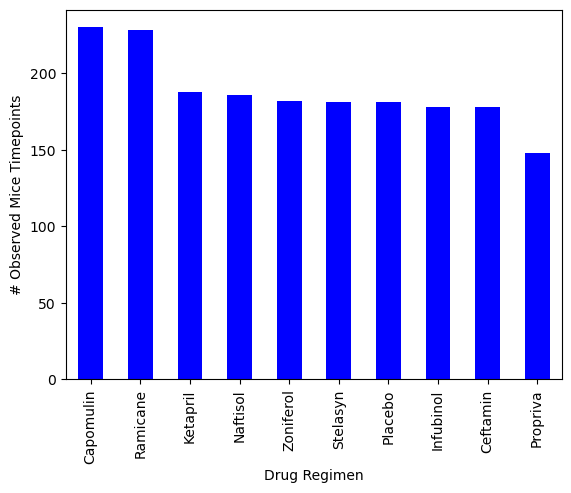

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# First, find out how many Timepoints per Drug Regimen
timepoint_count = cleaned_data["Drug Regimen"].value_counts()

# Using the values found, we can create the bar chart
pandas_bar = timepoint_count.plot(kind="bar",color = "blue", xlabel = "Drug Regimen", ylabel = "# Observed Mice Timepoints")
plt.show()

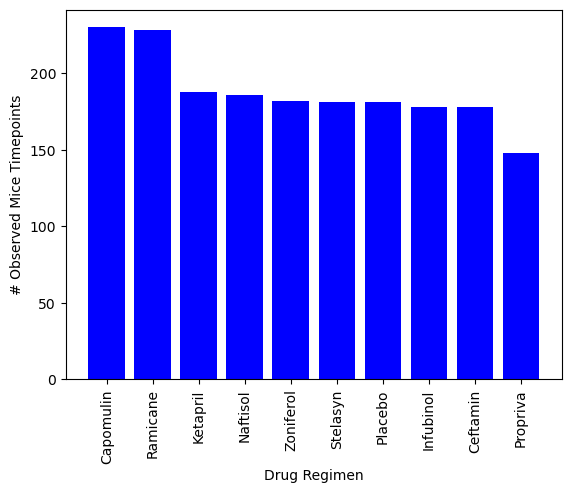

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get axis values
# X axis = Drug Regimens 
drug_regimens = timepoint_count.index.values
# Y Axis = the # of observed timepoints for the Drug Regimens
drug_regimens_count = timepoint_count.values

# Format graph
plt.bar(drug_regimens, drug_regimens_count, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mice Timepoints")
plt.xticks(rotation = 90)

plt.show()

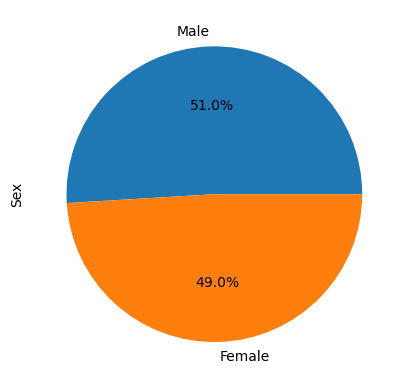

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of mice in each "Sex" category
female_vs_male = cleaned_data["Sex"].value_counts()

# Create the plot and apply desired formatting
pandas_pie = female_vs_male.plot.pie(autopct= "%1.1f%%", ylabel = 'Sex')

plt.show()


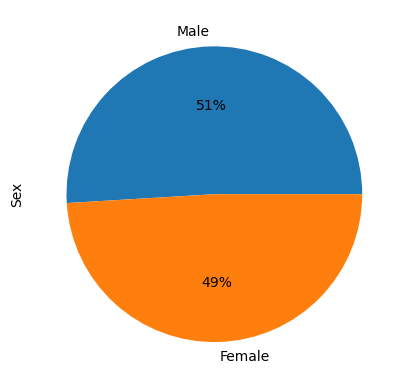

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Find the pie slices
sex_value = female_vs_male.index.values

# Find the value of those slices
sex_count = female_vs_male.values

# Plot the pie chart
plt.ylabel("Sex")
plt.pie(sex_count, labels = sex_value, autopct="%1.0f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a reduced dataframe that only has the four asked for treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
reduced_df = cleaned_data[cleaned_data["Drug Regimen"].isin(treatments)]
reduced_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = reduced_df.groupby('Mouse ID').max()['Timepoint']

In [15]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_merge = pd.merge(last_timepoint, combined_data, on=("Mouse ID","Timepoint"),how="left")
last_timepoint_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Done up above to create the reduced dataframe

In [17]:
# Create empty list to fill with tumor vol data (for plotting)
tum_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_count = 0

for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol = last_timepoint_merge.loc[last_timepoint_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Run IQR and outlier equations
    quartiles = tum_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    #mean = tum_vol.mean()
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

    # add subset
   # tum_inner = [drug, tum_vol]
    tum_vol_list.append(tum_vol)
   # tum_vol_list.append(tum_inner)
    #tum_vol_list.append(1)
    
    # Determine outliers using upper and lower bounds
    outliers = tum_vol.loc[(tum_vol < lower_bound) | (tum_vol > upper_bound)]

    # Print results
    print(f"{drug}'s potential outliers: {outliers}")

    drug_count += 1



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [18]:
# Create empty list to fill with tumor vol data (for plotting)
tum_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_count = 0

# Create a dictionary to connect the list of tumor values to the drug regimens for the boxplot. (This feels clunky but I couldn't think of another way to do it).
boxplot_dict = {}

for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol = last_timepoint_merge.loc[last_timepoint_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Run IQR and outlier equations
    quartiles = tum_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    #mean = tum_vol.mean()
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

    # add subset
   # tum_inner = [drug, tum_vol]
    tum_vol_list.append(tum_vol)
   # tum_vol_list.append(tum_inner)
    #tum_vol_list.append(1)
    
    # Determine outliers using upper and lower bounds
    outliers = tum_vol.loc[(tum_vol < lower_bound) | (tum_vol > upper_bound)]

    # Add the drug and it's tumor value to the dictionary.
    boxplot_dict[drug] = tum_vol_list[drug_count]

    # Print results
    print(f"{drug}'s potential outliers: {outliers}")

    drug_count += 1



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, '')

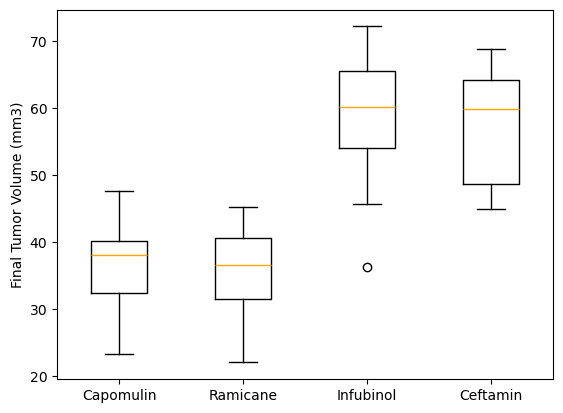

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Convert the dictionary created above into a DataFrame for the boxplot.
boxplot_df = pd.DataFrame(boxplot_dict)

boxplot = boxplot_df.boxplot(grid = False, color = dict(boxes = 'black', whiskers='black', medians = 'orange'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

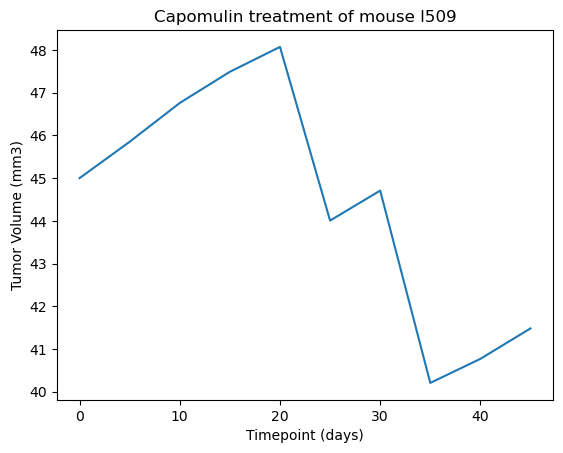

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify the data for Mouse l509
capomulin_single = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == "l509")]

# Reduce the DataFrame to only hold Timepoint and Tumor Volume.
reduced_capomulin_df = capomulin_single[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

# Set the x axis. Since we set the index as 'Timepoint' in the above step, this is just the index values.
timepoint = reduced_capomulin_df.index.values

# Find the tumor volume at each timepoint
tumor_vol = reduced_capomulin_df.values

plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

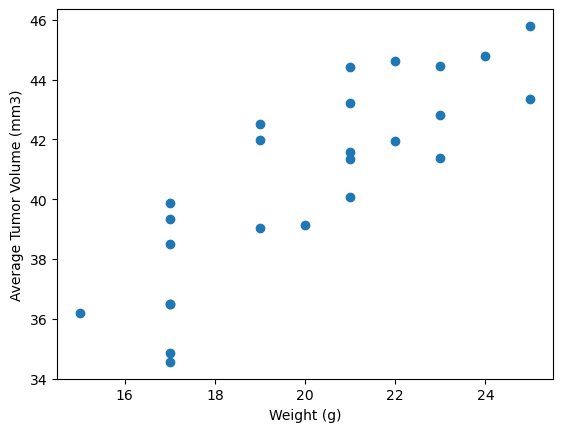

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create a DataFrame that only has the Capomulin data
capomulin_df = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin")]

# Group the Capomulin data by Mouse ID
group_capomulin_df = capomulin_df.groupby("Mouse ID")

# Find the average Tumor Volume and weight for each Mouse ID
avg_tum_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
avg_weight = group_capomulin_df["Weight (g)"].mean()

# Create a DataFrame for the weight and average tumor volume of each mouse
avg_capomulin_df = pd.DataFrame({"Weight (g)": avg_weight, "Tumor Volume (mm3)": avg_tum_vol})

plt.scatter(avg_weight, avg_tum_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


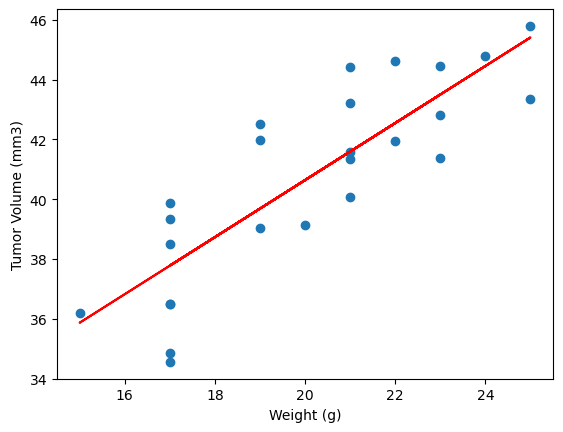

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use the pearsonr function with the weight and average tumor volume values calculated above to find the correlation
correlation = st.pearsonr(avg_weight,avg_tum_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Set the x and y values using the two columns of the avg_capomulin_df DataFrame created above
x_values = avg_capomulin_df["Weight (g)"]
y_values = avg_capomulin_df["Tumor Volume (mm3)"]

# Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tum_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()